In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def generate_data(initialValue, numberOfValues):
    generatedArray = np.zeros(numberOfValues)
    generatedArray[0] = initialValue
    for i in range(1, numberOfValues):
        generatedArray[i] = 4 * generatedArray[i-1] * (1-generatedArray[i-1])
    return generatedArray

In [40]:
trainingData = generate_data(0.35, 200)
testData = generate_data(trainingData[189], 10)

weightsLayer1 = np.array([np.random.normal(size=5), 
                         np.random.normal(size=5)]).T
biasesLayer1 = np.array(np.random.normal(size=5))

print(biasesLayer1)
weightsLayer2 = np.array(np.random.normal(size=5)).T
biasLayer2 = np.random.normal()

learningRate = 0.1
errorThreshold = 0.0015

[ 0.43483739  0.12091967 -1.40646438  1.60327817 -0.41169933]


In [41]:
def logSigmoid(array):
    for i in range (0, len(array)):
        array[i] = 1 / (1 + np.exp(-array[i]))

In [42]:
meanSquaredError = 1
iterationError = np.zeros(188)
mse_iterations = []

while meanSquaredError > errorThreshold:
    for index in range(2, 190):
        p = np.array([trainingData[index-1], trainingData[index-2]])
        t = trainingData[index]
        # Step 1: Forward propagate
        netInputFirstLayer = np.dot(weightsLayer1, p.reshape(2,1)) + biasesLayer1.reshape(5, 1)
        logSigmoid(netInputFirstLayer)
        outputFirstLayer = netInputFirstLayer

        netOutput = np.dot(outputFirstLayer.reshape(1, 5), weightsLayer2.reshape(5, 1)) + biasLayer2 # Same as the net input to the second layer as it is a linear transfer function
        error = trainingData[index] - netOutput
        iterationError[index-2] = error.ravel()[0]
        # Step 2: Backpropagate the error
        sensitivitySecondLayer = -2 * error
        functionDerivativeMatrix = np.zeros([len(outputFirstLayer),len(outputFirstLayer)])
        # print(outputFirstLayer)
        for i in range(0, len(outputFirstLayer)):
            functionDerivativeMatrix[i][i] = outputFirstLayer.ravel()[i] * (1 - outputFirstLayer.ravel()[i])
        sensitivityFirstLayer = (sensitivitySecondLayer) * (np.dot(weightsLayer2, functionDerivativeMatrix))
        # Step 3: Update the weights and biases
        weightsLayer1 = weightsLayer1 - learningRate * np.dot(sensitivityFirstLayer.reshape(5,1), p.reshape(1,2))
        biasesLayer1 = biasesLayer1 - learningRate * sensitivityFirstLayer
        weightsLayer2 = weightsLayer2 - learningRate * sensitivitySecondLayer * outputFirstLayer.T
        biasLayer2 = biasLayer2 - learningRate * sensitivitySecondLayer
    
    meanSquaredError = np.mean(iterationError.flatten() ** 2)
    mse_iterations.append(meanSquaredError)
    

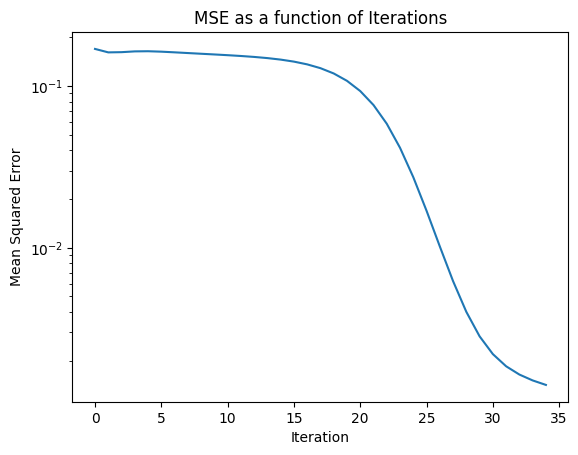

In [43]:
plt.title("MSE as a function of Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.semilogy(mse_iterations)

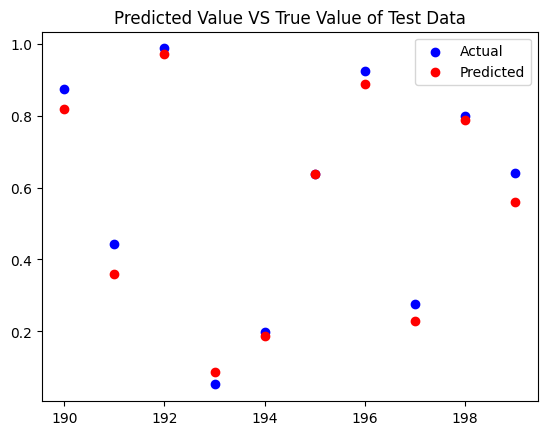

In [44]:
net_output = np.zeros(10)
expected_output = np.zeros(10)
for index in range(190, 200):
    p = np.array([trainingData[index-1], trainingData[index-2]])
    t = trainingData[index]
    netInputFirstLayer = np.dot(weightsLayer1, p.reshape(2,1)) + biasesLayer1.reshape(5, 1)
    logSigmoid(netInputFirstLayer)
    outputFirstLayer = netInputFirstLayer

    netOutput = np.dot(outputFirstLayer.reshape(1, 5), weightsLayer2.reshape(5, 1)) + biasLayer2 # Same as the net input to the second layer as it is a linear transfer function
    net_output[index-190] = netOutput[0][0]
    expected_output[index-190] = t
    
x = [190, 191, 192, 193, 194, 195, 196, 197, 198, 199]

plt.title("Predicted Value VS True Value of Test Data")

plt.scatter(x, expected_output, label='Actual', color='blue')
plt.scatter(x, net_output, label='Predicted', color='red')
plt.legend()
plt.show()